In [1]:
# feel free to comment out this code block

from five_one_one import is_python_version

assert is_python_version(3, 9, 7)

In [2]:
from math import sqrt
from time import time

In [3]:
def test_fib(f):
    assert f(1) == 1
    assert f(2) == 1
    assert f(3) == 2
    assert f(4) == 3
    assert f(5) == 5
    assert f(6) == 8
    assert f(7) == 13
    assert f(8) == 21

In [4]:
def fib0(x):
    """
        Recursive implementation with no `if`s and no `assert`s
    """
    try:
        # raises ValueError if x is negative or <= 2
        _ = sqrt(x-3)
    except (ZeroDivisionError, ValueError):
        # if x <= 2, return 1
        return 1
    
    return fib0(x-1) + fib0(x-2)

test_fib(fib0)

In [5]:
def fib1(x):
    """
        Classic recursive solution
    """
    if x <= 2:
        return 1
    return fib1(x-1) + fib1(x-2)

test_fib(fib1)

In [6]:
def fib2(x):
    """
        Classic iterative approach
    """
    if x <= 2:
        return 1
    seq = [1, 1]
    while len(seq) < x:
        seq.append(seq[-1] + seq[-2])
    return seq[x-1]

test_fib(fib2)

In [7]:
def fib3(x):
    """
        Recursive solution with memoization
    """
    
    if x <= 2:
        return 1
    
    memo = {1: 1, 2: 1}
    def fib3_inner(_x):
        if _x not in memo:
            memo[_x] = fib3_inner(_x-1) + fib3_inner(_x-2)
        return memo[_x]
    
    return fib3_inner(x)

test_fib(fib3)

In [8]:
def fib4(x):
    """
        Alternate iterative approach
    """
    if x <= 2:
        return 1
    seq = [1]*x
    for i in range(2, x):
        seq[i] = seq[i-1] + seq[i-2]
    return seq[-1]

test_fib(fib4)

In [9]:
def fib5(x):
    """
        Clever iterative approach that doesn't require a list (with for loop)
    """
    if x <= 2:
        return 1
    former, latter = 1, 1
    for _ in range(2, x):
        former, latter = latter, former+latter
    return latter

test_fib(fib5)

In [10]:
def fib6(x):
    """
        Clever iterative approach that doesn't require a list (with while loop)
    """
    if x <= 2:
        return 1
    former, latter = 1, 1
    ix = 2
    while ix < x:
        former, latter = latter, former+latter
        ix += 1
    return latter

test_fib(fib6)

In [11]:
def fib7(x):
    """
        Iterative approach using a list multiplier and a while loop
    """
    if x <= 2:
        return 1
    seq = [1]*x
    ix = 2
    while ix < x:
        seq[ix] = seq[ix-1] + seq[ix-2]
        ix += 1
    return seq[-1]

test_fib(fib7)

In [12]:
from five_one_one.c import npfib

def fib8(x):
    """
        Numpy
    """
    arr = npfib(x)
    return arr[-1]

test_fib(fib8)

In [13]:
# see setup.py and pyfib.c (root directory of this repository)

from five_one_one.c import cfib as fib9

test_fib(fib9)

In [53]:
import matplotlib.pyplot as plt
#import numpy as np
from timeit import timeit

In [54]:
import numpy as np
# arguments to fib
MIN = 5
MAX = 25
INC = 5
xs = np.array(range(MIN, MAX+1, INC))

In [55]:
# this block will probably take a while to run

ys = np.array([
    [
        timeit(f"fib({x})", setup=f"from __main__ import fib{n} as fib", number=10)
        for x in xs
    ]
    for n in range(10)
])


In [56]:
def plot(fibs_to_use=[0, 1, 2, 3, 4, 5, 6]):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

    ax.set_xlabel("Arg to fib")
    ax.set_xticklabels(str(x) for x in xs)
    ax.set_xticks(xs)

    ax.set_ylabel("Runtime (seconds)")

    legend_and_colors = [
        ("try/except", "red",),
        ("naive recursive", "orange",),
        ("iterative (list, while, append)", "lightblue",),
        ("memoized recursive", "yellow",),
        ("iterative (list, for, list multiplier)", "darkblue",),
        ("iterative (clever, for)", "lightgreen",),
        ("iterative (clever, while)", "darkgreen",),
        ("iterative (list, while, list multiplier)", "blue",),
        ("iterative (np.array, while)", "gray",),
        ("cheating (C)", "#511",),
    ]
    legend, colors = zip(*legend_and_colors)
    
    width = float(INC)/float(len(fibs_to_use)+1)
    bars = [ax.bar(xs+(s*width), ys[ix], width=width-0.1, color=colors[ix]) for s, ix in enumerate(fibs_to_use)]
    ax.legend(bars, [legend[ix] for ix in fibs_to_use])
    
    fig.show()

/tmp/ipykernel_1662639/3692797454.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(str(x) for x in xs)
/tmp/ipykernel_1662639/3692797454.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


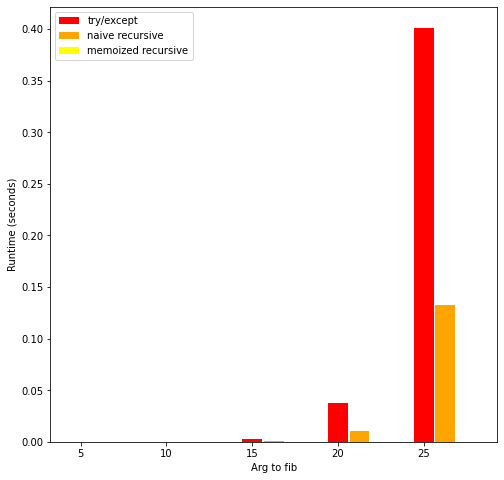

In [57]:
# compare recursive approaches
plot(fibs_to_use=[0, 1, 3,])

/tmp/ipykernel_1662639/3692797454.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(str(x) for x in xs)
/tmp/ipykernel_1662639/3692797454.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


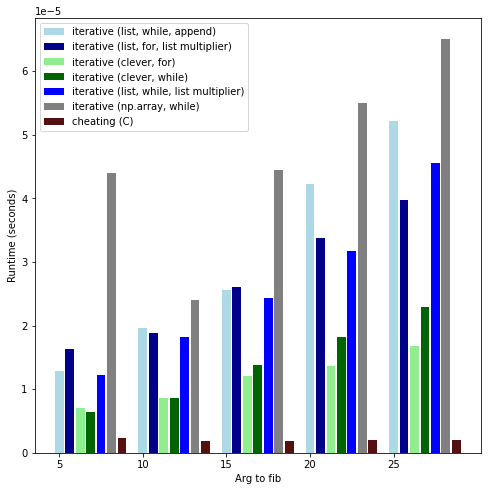

In [58]:
# iterative approaches
plot(fibs_to_use=[2, 4, 5, 6, 7, 8, 9])

/tmp/ipykernel_1662639/3692797454.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(str(x) for x in xs)
/tmp/ipykernel_1662639/3692797454.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


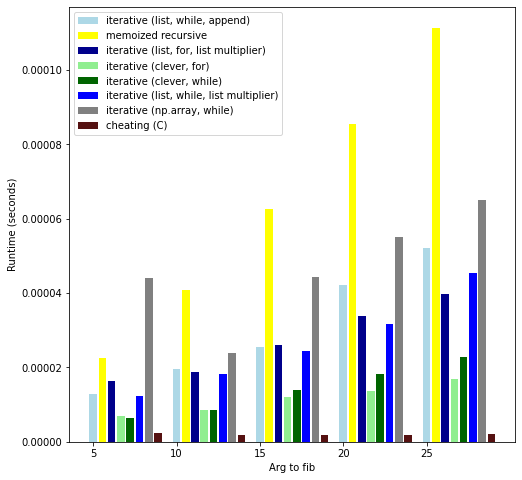

In [59]:
# iterative plus memoized recursive
plot(fibs_to_use=[2, 3, 4, 5, 6, 7, 8, 9,])

In [ ]:
# fastest ones
plot(fibs_to_use=[5, 6, 9,])

In [ ]:
# fib2 vs fib4
plot(fibs_to_use=[2, 4,])

### Why is fib2 generally faster than fib4?

I'm surprised by this. I would think that fib2's repeated calls to 
`.append()` would be significantly slower than fib4's usage of `[1]*x`.

In [23]:
timeit("[1]*1000")

1.61538420105353

In [24]:
timeit("for _ in range(1000): x.append(1)", setup="x=[]")

44.94344118563458

In [25]:
# just for laughs
timeit("[1 for _ in range(1000)]")

22.495067124720663

In [26]:
# :3
timeit("np.ones((1000,), dtype=np.int64)", setup="import numpy as np")

1.500084131024778

We've confirmed that repeatedly calling `.append()` inside a for loop is significantly slower than using `[1]*x`
to generate a list.

So why is iterative 1 slower than iterative 2?

My next theory is that is has to do with accessing elements of a list in the form `l[-1]` or `l[-2]` vs.
`l[i-1]` or `l[i-2]`. In the former, we use fast C code to access the last or next-to-last element. In the
latter we have to use slow Python arithmetic to determine the index to use. Let's test this out:

In [27]:
kings_of_rome = ["Romulus", "Numa Pompilius", "Tullius Hostilius", "Ancus Martius", "Lucius Tarquinius Priscus", "Servius Tullius", "Lucius Tarquinius Superbus"]

def f1(l):
    for ix in range(-1, -len(l)-1, -1):
        _ = l[ix]
        #print(_)

def f2(l):
    for ix in range(len(l)):
        _ = l[-1-ix]
        #print(_)

#f1(kings_of_rome)
#f2(kings_of_rome)

In [28]:
timeit("f1(kings_of_rome)", setup="from __main__ import f1, kings_of_rome")

0.42265249555930495

In [29]:
timeit("f2(kings_of_rome)", setup="from __main__ import f2, kings_of_rome")

0.4444397920742631

Found the culprit!

In [30]:
emperors_of_rome = [
    "Augustus", # Start of Julio-Claudian Dynasty
    "Tiberius",
    "Caligula",
    "Claudius", # I, Claudius
    "Nero",
    "Galba", # Year of 4 Emperors
    "Otho",
    "Vitelius",
    "Vespasian", # Start of Flavian Dynasty
    "Titus",
    "Dominitian",
    "Nerva", # Start of Nerva-Antonine Dynasty/"5 good emperors"
    "Trajan",
    "Hadrian",
    "Antoninus Pius",
    "Marcus Aurelius",
    "Commodus", # Marcus Aurelius's idiot son
    "Pertinax", # Year of 5 emperors (not all listed)
    "Didius Julianus",
    "Septimius Severus", # Severan dynasty
    "Caracalla",
    "Geta",
    "Macrinus/Diadumanian",
    "Elagabalus",
    "Severus Alexander",
    "Maximinus Thrax",
    "Gordian I", # Gordian Dynasty
    "Gordian II",
    "Pupienus",
    "Balbinus",
    "Gordian III",
    # starting to get into crisis of 3rd century and it would get messy
    # not continuing
]

In [31]:
import operator, functools

functools.reduce(operator.add, np.ones((1000,), dtype=np.int64))

1000

In [32]:
ones = np.ones((1000, 2,), dtype=np.int64)

In [33]:
ones[1] = (1, 2)

In [34]:
ones

array([[1, 1],
       [1, 2],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]])